# Siddhi Sandip Kakani
# Phase 2 Golden Task

# Build a spam filter using NLP and machine learning to identify and filter out spam emails

In [5]:
import pandas as pd  # Importing pandas library for data manipulation and analysis.
import tensorflow as tf  # Importing TensorFlow library for building and training deep learning models.
from tensorflow import keras  # Importing Keras API from TensorFlow for building neural networks.
from matplotlib import pyplot as plt  # Importing matplotlib library for data visualization.
from tensorflow.keras import Sequential, layers  # Importing Sequential and layers modules from Keras for building neural network architectures.


In [6]:
df = pd.read_csv('emails.csv')  # Reading the dataset 'emails.csv' into a pandas DataFrame.
df.head()  # Displaying the first few rows of the DataFrame to inspect the data.


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
tf.random.set_seed(69)  # Setting the random seed to ensure reproducibility of results.
df = df.sample(frac=True)  # Randomly shuffling the rows of the DataFrame.
df.head()  # Displaying the first few rows of the shuffled DataFrame.


,text,spam
1955,Subject: conference on risk management : the s...,0
1225,Subject: important announcement : your applica...,1
5114,Subject: alp presentation this will be in eb ...,0
419,Subject: big range of all types of downloadabl...,1
5616,Subject: re : presentation if you would like ...,0


In [8]:
df['spam'].unique()  # Retrieving the unique values of the 'spam' column in the DataFrame.


array([0, 1], dtype=int64)

In [9]:
df.info()  # Displaying information about the DataFrame including column names, data types, and non-null counts.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5728 entries, 1955 to 4426
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 134.2+ KB


In [10]:
df['text'].info()  # Displaying information about the 'text' column in the DataFrame.


<class 'pandas.core.series.Series'>
Int64Index: 5728 entries, 1955 to 4426
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
5728 non-null   object
dtypes: object(1)
memory usage: 89.5+ KB


In [11]:
df['spam'].info()  # Displaying information about the 'spam' column in the DataFrame.


<class 'pandas.core.series.Series'>
Int64Index: 5728 entries, 1955 to 4426
Series name: spam
Non-Null Count  Dtype
--------------  -----
5728 non-null   int64
dtypes: int64(1)
memory usage: 89.5 KB


In [12]:
df['text'].unique()  # Retrieving the unique values of the 'text' column in the DataFrame.


<bound method Series.unique of 1955    Subject: conference on risk management : the s...
1225    Subject: important announcement : your applica...
5114    Subject: alp presentation  this will be in eb ...
419     Subject: big range of all types of downloadabl...
5616    Subject: re : presentation  if you would like ...
                              ...                        
2115    Subject: re : additional bloomberg terminal fo...
4744    Subject: real options conference programs ( uc...
5455    Subject: confirmation of your order  this is a...
3490    Subject: re : worldpower  mark ,  i agree with...
4426    Subject: program posted  hello all ,  the prog...
Name: text, Length: 5728, dtype: object>

In [61]:
def count_word(word, column):
    """
    Count the frequency of a word in a specific column of the DataFrame.

    Parameters:
    - word: The word to count.
    - column: The column in which to search for the word.

    Returns:
    - The total frequency of the word in the specified column.
    """
    words = df[column].astype(str).str.lower().str.split()  # Splitting text into words and converting to lowercase.
    counts = words.apply(lambda x: x.count(word))  # Counting occurrences of the word in each row.
    return counts.sum()  # Summing up the total frequency of the word in the column.

word = '0'  # Word to search for.
column = 'spam'  # Column to search within.
frequency_0 = count_word(word, column)  # Calling the function to count the frequency of the word.
print(f'The word "{word}" appears {frequency_0} times in the column "{column}".')  # Printing the result.


The word "0" appears 4360 times in the column "spam".


In [62]:
word = '1'  # Word to search for.
column = 'spam'  # Column to search within.
frequency_1 = count_word(word, column)  # Calling the function to count the frequency of the word.
print(f'The word "{word}" appears {frequency_1} times in the column "{column}".')  # Printing the result.


The word "1" appears 1368 times in the column "spam".


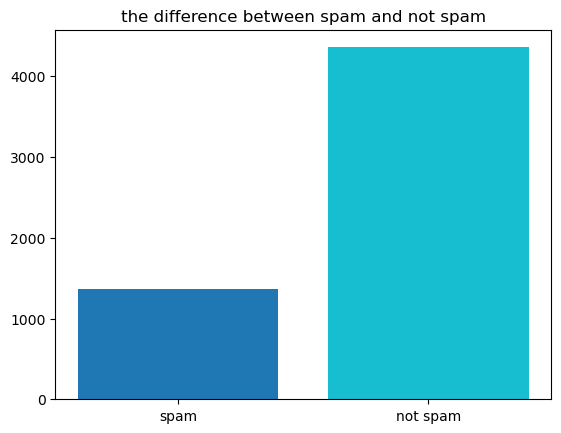

In [63]:
def plot():
    """
    Plot the frequency of words in different categories.

    This function plots the frequency of words in different categories (e.g., spam and not spam).

    Parameters: None
    Returns: None
    """
    words = ['spam', 'not spam']  # Categories of words.
    freq = [frequency_1, frequency_0]  # Frequency of words in each category.
    plt.bar(words, freq, color=['tab:blue', 'tab:cyan'])  # Plotting the bar chart.
    plt.title('The Difference Between Spam and Not Spam')  # Adding a title to the plot.
    plt.xlabel('Categories')  # Adding label for the x-axis.
    plt.ylabel('Frequency')  # Adding label for the y-axis.
    plt.show()  # Displaying the plot.

plot()  # Calling the function to plot the frequency of words.


In [65]:
def absv(absv):
    """
    Create a lambda function to format absolute values for use in matplotlib pie chart labels.

    Parameters:
    - absv: List of absolute values corresponding to pie chart slices.

    Returns:
    - Lambda function that formats percentage values with absolute values as labels.
    """
    gen = iter(absv)  # Create an iterator for absolute values.
    return lambda pct: f'{pct:.1f}%\n({next(gen)})'  # Define lambda function to format labels.

# No comment needed here as the function is self-explanatory.


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


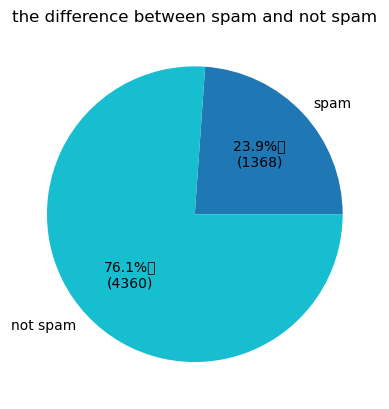

In [90]:

words = ['spam', 'not spam']  # Categories of words.
freq = [frequency_1, frequency_0]  # Frequency of words in each category.

# Plot a pie chart with labels, percentages, and colors
plt.pie(freq, labels=words, autopct=absv(freq), colors=['tab:blue', 'tab:cyan'])  # Plotting the pie chart.

# Add a title to the plot
plt.title('The Difference Between Spam and Not Spam')  # Adding a title to the plot.

# Show the plot
plt.show()  # Displaying the plot.


In [91]:
df_0 = df[df['spam'] == 0]  # Filtering the DataFrame to select rows where the 'spam' column has value 0.


In [98]:
df_0

,text,spam
1955,Subject: conference on risk management : the s...,0
5114,Subject: alp presentation this will be in eb ...,0
5616,Subject: re : presentation if you would like ...,0
3529,"Subject: conference steve , the slides are o...",0
5532,"Subject: re : new lacima publication fiona , ...",0
...,...,...
2115,Subject: re : additional bloomberg terminal fo...,0
4744,Subject: real options conference programs ( uc...,0
5455,Subject: confirmation of your order this is a...,0
3490,"Subject: re : worldpower mark , i agree with...",0


In [92]:
df_1 = df[df['spam'] == 1]  # Filtering the DataFrame to select rows where the 'spam' column has value 1.


In [99]:
df_1

,text,spam
1225,Subject: important announcement : your applica...,1
419,Subject: big range of all types of downloadabl...,1
18,Subject: security alert - confirm your nationa...,1
587,Subject: porn p . o . : your 10 free pictures ...,1
1309,Subject: save your money by getting an oem sof...,1
...,...,...
15,Subject: search engine position be the very f...,1
1186,Subject: professional logo for you now workin...,1
152,"Subject: 3 locations free : orlando , las vega...",1
1207,Subject: business partnership ( urgent / confi...,1


In [100]:
# Find the number of rows in the smaller group
n = min(len(df_0), len(df_1))

In [101]:
# Sample n rows from the larger group without replacement
df_0_balanced = df_0.sample(n, replace=False)

In [102]:
df_0_balanced

,text,spam
2209,"Subject: new pc shirley , ok . vince - - -...",0
3024,Subject: congratulations vince : congratulati...,0
5365,"Subject: rdi conference - may 17 - 19 , 2000 ...",0
1694,Subject: thursday summer intern dinner vince ...,0
3508,Subject: friday brown bag for options pricing ...,0
...,...,...
1602,Subject: texas a & m at galveston dr . bill m...,0
5598,"Subject: re : order for book julie , the dis...",0
2013,Subject: preliminary interviews with the resea...,0
3948,Subject: re : fw : possible visit to enron by ...,0


In [104]:
# Concatenate the balanced group with the smaller group
df_balanced = pd.concat([df_0_balanced, df_1])
df = df_balanced
# Print the balanced DataFrame
print(df_balanced)

                                                   text  spam
2209  Subject: new pc  shirley ,  ok .  vince  - - -...     0
3024  Subject: congratulations  vince : congratulati...     0
5365  Subject: rdi conference - may 17 - 19 , 2000  ...     0
1694  Subject: thursday summer intern dinner  vince ...     0
3508  Subject: friday brown bag for options pricing ...     0
...                                                 ...   ...
15    Subject: search engine position  be the very f...     1
1186  Subject: professional logo for you now  workin...     1
152   Subject: 3 locations free : orlando , las vega...     1
1207  Subject: business partnership ( urgent / confi...     1
706   Subject: urgent response  dear sir / madam ,  ...     1

[2736 rows x 2 columns]


In [105]:
word = '0'  # Word to search for.
column = 'spam'  # Column to search within.
frequency_fixed_0 = count_word(word, column)  # Calling the function to count the frequency of the word.
print(f'The word "{word}" appears {frequency_fixed_0} times in the column "{column}".')  # Printing the result.


The word "0" appears 1368 times in the column "spam".


In [106]:
word = '1'  # Word to search for.
column = 'spam'  # Column to search within.
frequency_fixed_1 = count_word(word, column)  # Calling the function to count the frequency of the word.
print(f'The word "{word}" appears {frequency_fixed_1} times in the column "{column}".')  # Printing the result.


The word "1" appears 1368 times in the column "spam".


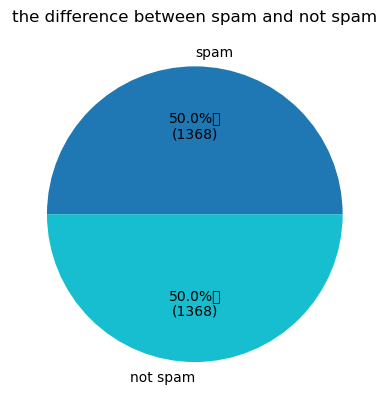

In [109]:
words = ['spam', 'not spam']  # Categories of words.
freq = [frequency_fixed_1, frequency_fixed_0]  # Frequency of words in each category.

# Plot a pie chart with labels and colors
plt.pie(fre, labels=word,autopct=absv(fre) ,colors=['tab:blue', 'tab:cyan']) #again my fav colors

# Add a title to the plot
plt.title('the difference between spam and not spam')

# Show the plot
plt.show()

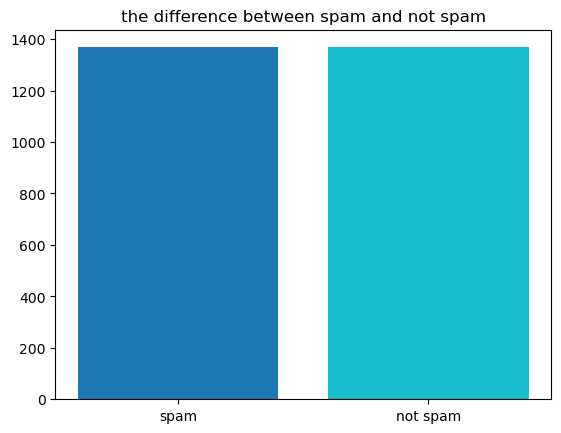

In [110]:
def plot():
    """
    Plot the frequency of words in different categories.

    This function plots the frequency of words in different categories (e.g., spam and not spam).

    Parameters: None
    Returns: None
    """
    words = ['spam', 'not spam']  # Categories of words.
    freq = [frequency_fixed_1, frequency_fixed_0]  # Frequency of words in each category.
    plt.bar(words, freq, color=['tab:blue', 'tab:cyan'])  # Plotting the bar chart.
    plt.title('The Difference Between Spam and Not Spam')  # Adding a title to the plot.
    plt.xlabel('Categories')  # Adding label for the x-axis.
    plt.ylabel('Frequency')  # Adding label for the y-axis.
    plt.show()  # Displaying the plot.

plot()  # Calling the function to plot the frequency of words.


In [111]:
df.sample(frac=1)  # Randomly shuffles all rows in the DataFrame.


,text,spam
4223,Subject: re : visit to enron by professor nali...,0
1233,Subject: manage your diabetes effortlessly wit...,1
188,"Subject: less time , less effort but better sa...",1
5010,Subject: new computers hi lyn : hope things ...,0
613,Subject: looking for property in spain ? look...,1
...,...,...
636,"Subject: i think , yes . the things we sell a...",1
677,Subject: entrust your visual identity to us t...,1
1969,Subject: cvs of candidates for rac support rol...,0
109,Subject: [ ilug ] re : popular . biz and . com...,1


In [112]:
df = df.sample(frac=1)  # Randomly shuffles all rows in the DataFrame.

x = df['text'].astype(str)  # Extracts the 'text' column as input features and converts to string type.
y = df['spam'].astype(float)  # Extracts the 'spam' column as target labels and converts to float type.


In [113]:
x.head(10)

1       Subject: the stock trading gunslinger  fanny i...
1369    Subject: sacramento weather station  fyi  - - ...
3286    Subject: re : meeting requested  i will ask re...
4822    Subject: re :  thanks vince .  dinner on sunda...
4991    Subject: 7 - 1 - 00 to 7 - 15 - 00 off duty an...
5217    Subject: program  mike ,  here is third versio...
5018    Subject: december 15 th super saturday friday ...
3805    Subject: re : tanya ' s vacation  shirley ,  i...
250     Subject: set & forget ! blast your ad over 200...
4721    Subject: re : contract agreement  habiba ,  lo...
Name: text, dtype: object

In [114]:
y.head(10)

1       1.0
1369    0.0
3286    0.0
4822    0.0
4991    0.0
5217    0.0
5018    0.0
3805    0.0
250     1.0
4721    0.0
Name: spam, dtype: float64

In [115]:
vact = tf.keras.layers.TextVectorization(
    max_tokens=150000,  # Maximum vocabulary size.
    output_sequence_length=70,  # Maximum sequence length for each input.
    pad_to_max_tokens=True  # Pad sequences to the maximum token limit.
)

df_tensor = tf.convert_to_tensor(df["text"].astype(str), dtype=tf.string)  # Convert 'text' column to tensor.
vact.adapt(df_tensor)  # Adapt the TextVectorization layer to the input text data.


In [118]:
embed = tf.keras.layers.Embedding(
    150000,  # Input dimension (vocabulary size).
    128,  # Output dimension (embedding size).
)


In [119]:
model = Sequential([
    layers.Input(shape=(1,), dtype=tf.string),  # Input layer for text data.
    vact,  # TextVectorization layer.
    embed,  # Embedding layer.
    layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.2)),  # Bidirectional LSTM layer.
    layers.BatchNormalization(),  # Batch normalization layer.
    layers.Conv1D(128, 5, activation="relu"),  # Convolutional layer.
    layers.BatchNormalization(),  # Batch normalization layer.
    layers.Bidirectional(layers.GRU(64, return_sequences=True, dropout=0.2)),  # Bidirectional GRU layer.
    layers.BatchNormalization(),  # Batch normalization layer.
    layers.Conv1D(64, 5, activation="relu"),  # Convolutional layer.
    layers.BatchNormalization(),  # Batch normalization layer.
    layers.Bidirectional(layers.GRU(32, return_sequences=True, dropout=0.2)),  # Bidirectional GRU layer.
    layers.BatchNormalization(),  # Batch normalization layer.
    layers.Conv1D(32, 5, activation="relu"),  # Convolutional layer.
    layers.BatchNormalization(),  # Batch normalization layer.
    layers.Flatten(),  # Flatten layer.
    layers.Dense(1, activation="sigmoid")  # Output layer with sigmoid activation function.
])


In [120]:
model.summary()  # Displaying a summary of the model architecture.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 70)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 70, 128)           19200000  
                                                                 
 bidirectional (Bidirection  (None, 70, 256)           263168    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 70, 256)           1024      
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 66, 128)           163968    
                                                        

In [121]:
model.compile(
    loss="binary_crossentropy",  # Binary crossentropy loss function for binary classification.
    optimizer="Adam",  # Adam optimizer for training the model.
    metrics=["accuracy", "recall", "precision"]  # Evaluation metrics: accuracy, recall, and precision.
)


In [123]:
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Monitoring validation accuracy for early stopping.
    min_delta=0.0001,  # Minimum change in monitored metric to qualify as an improvement.
    patience=2,  # Number of epochs with no improvement after which training will be stopped.
    restore_best_weights=True,  # Restoring best model weights after early stopping.
)

tensorboard = tf.keras.callbacks.TensorBoard()  # TensorBoard callback for visualization.

chkpt = tf.keras.callbacks.ModelCheckpoint(
    'mango.ckpt',  # Filepath to save the model checkpoint.
    monitor='val_accuracy',  # Monitoring validation accuracy for saving the best model.
    save_best_only=True,  # Save only the best model.
    mode='auto',  # Mode for determining the best model to save.
    save_freq='epoch',  # Frequency of saving checkpoints (per epoch).
)


In [124]:
with tf.device('/GPU:0'):  # Utilizing GPU for training if available.
    model.fit(
        x,  # Input features (text data).
        y,  # Target labels.
        epochs=20,  # Number of training epochs.
        callbacks=[earlystopping, tensorboard, chkpt]  # Callbacks for monitoring and saving the model.
    )


Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 0.2761 - Accuracy: 0.8739 - recall: 0.8772 - precision: 0.8715INFO:tensorflow:Assets written to: mango.ckpt\assets


INFO:tensorflow:Assets written to: mango.ckpt\assets


86/86 [==============================] - 157s 1s/step - loss: 0.2761 - Accuracy: 0.8739 - recall: 0.8772 - precision: 0.8715
Epoch 2/20
86/86 [==============================] - 58s 669ms/step - loss: 0.0607 - Accuracy: 0.9806 - recall: 0.9810 - precision: 0.9803
Epoch 3/20
86/86 [==============================] - 58s 669ms/step - loss: 0.0120 - Accuracy: 0.9971 - recall: 0.9956 - precision: 0.9985
Epoch 4/20
86/86 [==============================] - 58s 669ms/step - loss: 0.0048 - Accuracy: 0.9989 - recall: 0.9978 - precision: 1.0000
Epoch 5/20
86/86 [==============================] - 57s 666ms/step - loss: 0.0066 - Accuracy: 0.9978 - recall: 0.9971 - precision: 0.9985
Epoch 6/20
86/86 [==============================] - 536s 6s/step - loss: 0.0169 - Accuracy: 0.9942 - recall: 0.9956 - precision: 0.9927
Epoch 7/20
86/86 [==============================] - 60s 703ms/step - loss: 0.0096 - Accuracy: 0.9971 - recall: 0.9963 - precision: 0.9978
Epoch 8/20
86/86 [==============================]